## LOADING LIBRARIES

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from pandas_profiling import ProfileReport
import pickle as pk
%matplotlib inline

In [2]:
%cd ..

c:\Users\CARNOT\DSN\DSN-KOWOPE-MART


## Files Directory

In [3]:
train_dir = "data/Train.csv"
test_dir = "data/Test.csv"

## Loading Train data

In [4]:
train = pd.read_csv(train_dir)
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [5]:
train.shape

(56000, 52)

## Checking for missing values

In [6]:
print('Detecting presence of null values\n')
print(train.isnull().sum())

Detecting presence of null values

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_

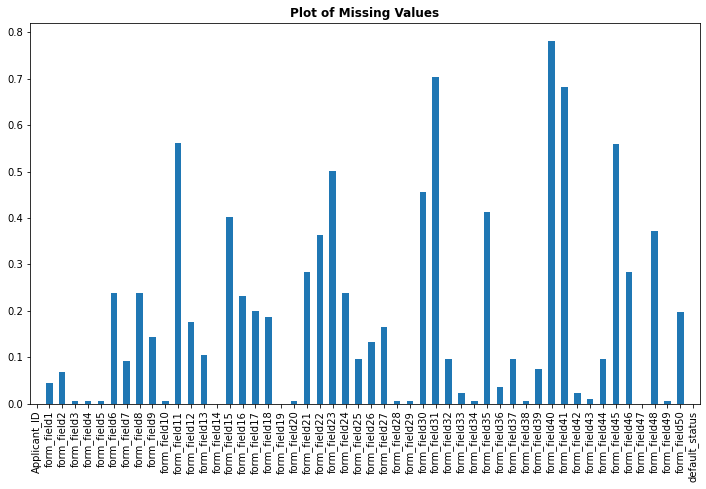

In [9]:
plt.figure(figsize=(12, 7))
(train.isnull().sum()/len(train)).plot.bar()
plt.title("Plot of Missing Values", weight="bold", size=12);

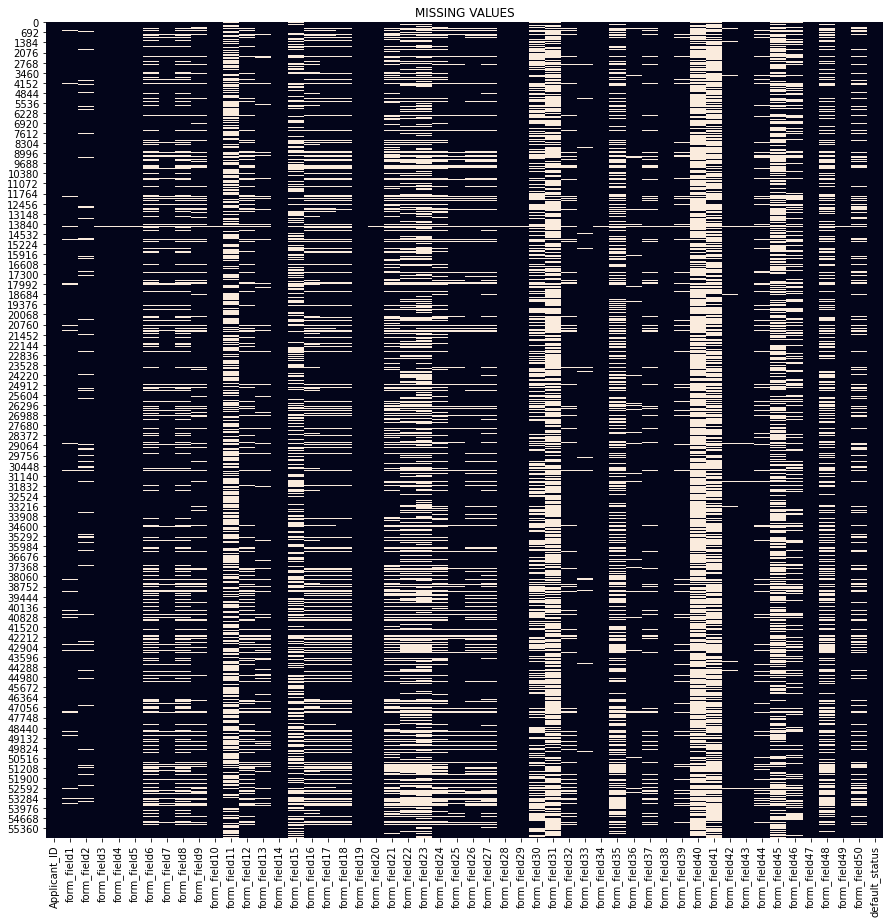

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(train.isnull(), cbar=False)
plt.title("MISSING VALUES");

## EDA

In [10]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

Because pandas-profiling can not handle the all the columns at ones they where broken down into halves

In [9]:
datasummary1 = ProfileReport(train.iloc[:, :25])

In [10]:
datasummary1.to_file("datasummary1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
datasummary2 = ProfileReport(train.iloc[:, 25:-2])

In [14]:
datasummary2.to_file("datasummary2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
train.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

            Checking if the class is balance/n


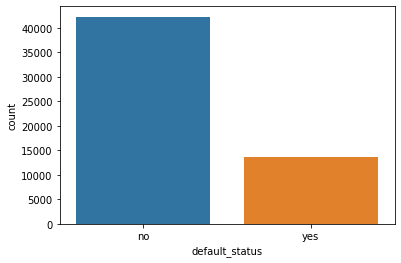

In [35]:
print('            Checking if the class is balance/n')
sns.countplot(x = train.default_status);

In [8]:
count = train['default_status'].value_counts()
print(count, '\n')
print(f'% of count non-fraud 0: {(count.iloc[0]/len(train))*100}')
print('-'*44)
print(f'% of count non-fraud 1: {(count.iloc[1]/len(train))*100}')

no     42285
yes    13715
Name: default_status, dtype: int64 

% of count non-fraud 0: 75.50892857142857
--------------------------------------------
% of count non-fraud 1: 24.491071428571427


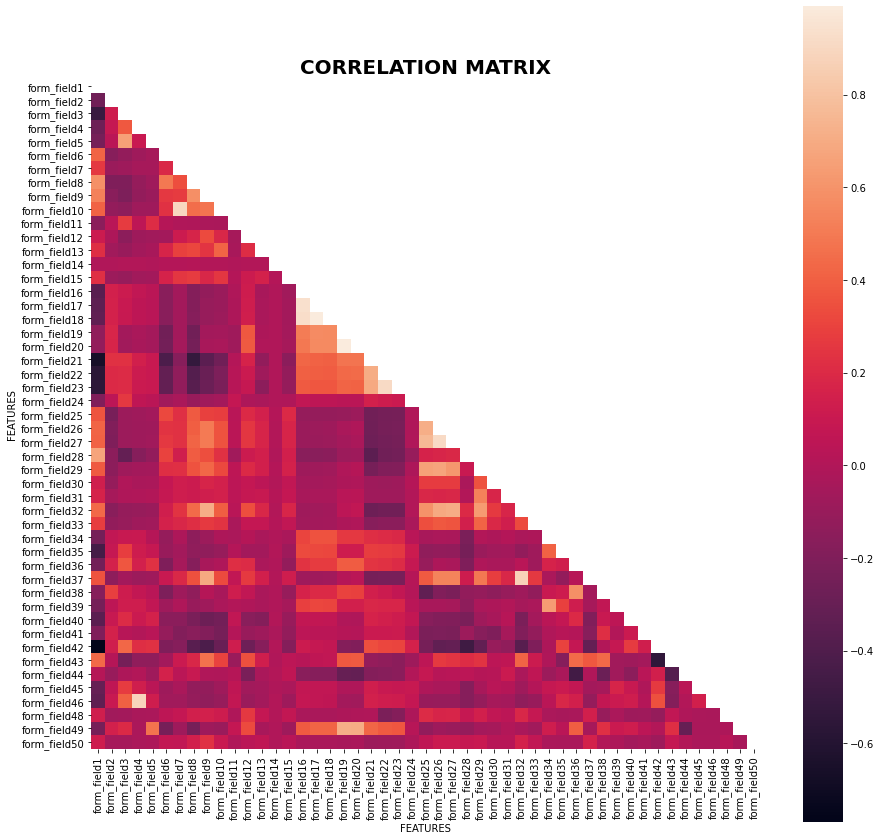

In [20]:
numerical_data = train.select_dtypes(exclude="object")
corr = numerical_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(corr, mask=mask, square=True)
plt.title("CORRELATION MATRIX", size=20, weight="bold")
plt.xlabel("FEATURES")
plt.ylabel("FEATURES");

In [51]:
def corr_concern(x):
    if x >=0.6:
        return True
    elif x<=-0.6:
        return True
    else:
        return x
    
pd.set_option("display.max_columns", 50)

corr.applymap(corr_concern).to_excel("data/corr.xlsx", float_format="%.2f")

In [34]:
numerical_data.skew()

form_field1       0.120458
form_field2       4.299532
form_field3       4.233351
form_field4       5.427310
form_field5      10.465192
form_field6       6.203867
form_field7      36.556045
form_field8       3.935070
form_field9       3.503331
form_field10     18.007423
form_field11      9.633062
form_field12      4.734462
form_field13     53.667658
form_field14    118.547478
form_field15      5.533132
form_field16      3.999875
form_field17      5.044450
form_field18      4.966005
form_field19      3.327070
form_field20      3.174999
form_field21      1.714100
form_field22      0.799056
form_field23      0.901040
form_field24     30.440138
form_field25      1.711413
form_field26      1.471489
form_field27      1.452973
form_field28      0.993735
form_field29      0.933382
form_field30      0.038387
form_field31      0.738210
form_field32      2.447196
form_field33      1.565371
form_field34      6.205108
form_field35      4.167426
form_field36      2.634626
form_field37      1.949271
f

## Generating the target or output and onehotencoding the output

In [54]:
train["default_status"].unique()

array(['no', 'yes'], dtype=object)

In [77]:
# Creating a duplicate of the raw data for the purpose of analysis
train_copy = train.copy()


* Onehotencoding categorical data

In [78]:
mapping = {"no": 0, "yes": 1}
train_copy["default_status"] = train_copy["default_status"].map(mapping)
train_copy["default_status"].unique()

array([0, 1], dtype=int64)

In [40]:
train["form_field47"].unique()

array(['charge', 'lending'], dtype=object)

In [79]:
mapping = {"charge": 1, "lending":0}
train_copy["form_field47"] = train_copy['form_field47'].map(mapping)
train_copy["form_field47"].unique()

array([1, 0], dtype=int64)

* High cardinality and correlation

In [80]:
# dropping column with high cardinality
train_copy.drop(columns=["Applicant_ID"], inplace = True)
# dropping columns that are highly correlated
columns = ["form_field1", "form_field2", "form_field3", "form_field4", "form_field7", "form_field8", "form_field9", "form_field15", "form_field16", "form_field19", "form_field24", "form_field29", "form_field30", "form_field31", "form_field33", "form_field34", "form_field35", "form_field36", "form_field38", "form_field40", "form_field41", "form_field43", "form_field44", "form_field45", "form_field47", "form_field48", "form_field50", "default_status"]
train_copy = train_copy[columns]

* Missing values

In [81]:
# Calculating the percentage of missing values and removing any missing above 40%
missing_val_per = train_copy.isnull().sum()/len(train_copy)*100 < 40
train_copy = train_copy.iloc[:, missing_val_per.values]

In [96]:
# Imputing the mean value for missing values where the default status is no
train_copy_0 = train_copy[train_copy["default_status"]==0]
impute_missing = SimpleImputer()
train_copy_0 = impute_missing.fit_transform(train_copy_0)
train_copy_0 = pd.DataFrame(train_copy_0, columns=train_copy.columns)

In [97]:
# Imputing the mean value for missing values where the default status is yes
train_copy_1 = train_copy[train_copy["default_status"]==1]
impute_missing = SimpleImputer()
train_copy_1 = impute_missing.fit_transform(train_copy_1)
train_copy_1 = pd.DataFrame(train_copy_1, columns=train_copy.columns)

In [99]:
# concatenating the two data above
train_copy = pd.concat([train_copy_0, train_copy_1], 0)

In [106]:
X, y = train_copy.drop(columns="default_status"), train_copy["default_status"]
over_sampling = SMOTE(random_state=234, k_neighbors=13)
X_oversampling, y_oversampling = over_sampling.fit_resample(X, y)
train_copy_res = pd.concat([X_oversampling, y_oversampling], axis=1)

* Spitting the train data

In [110]:
X, y = train_copy_res.drop(columns="default_status"), train_copy_res["default_status"]
sss = StratifiedShuffleSplit(test_size=0.2, random_state=234)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

* Building pipeline for training the data

In [111]:
scaler = StandardScaler()

In [132]:
rf = RandomForestClassifier(random_state= 1)
pipe_rf = make_pipeline(scaler, rf)
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)

In [134]:
with open("model/model_rf.pk", "wb") as file:
    pk.dump(pipe_rf, file)

In [114]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      8457
         1.0       0.94      0.92      0.93      8457

    accuracy                           0.93     16914
   macro avg       0.93      0.93      0.93     16914
weighted avg       0.93      0.93      0.93     16914



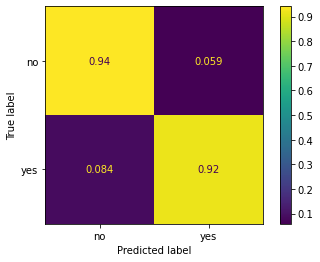

In [117]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_rf, normalize="true", labels=[0,1], display_labels=["no", "yes"]);

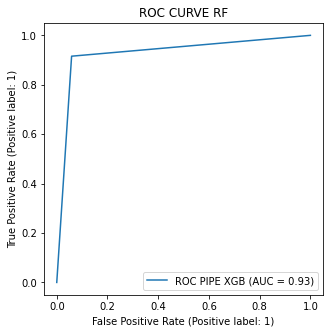

In [142]:
fig, ax = plt.subplots(figsize=(5,5))
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_pred_rf, name="ROC PIPE XGB", ax=ax)
ax.set_title("ROC CURVE RF");
plt.savefig("report/roc_curve_rf.jpg")

In [122]:
xgb = XGBClassifier()
pipe_xgb = make_pipeline(scaler, xgb)
pipe_xgb.fit(X_train, y_train)
y_pred_xgb = pipe_xgb.predict(X_test)

In [135]:
with open("model/model_xgb.pk", "wb") as file:
    pk.dump(pipe_xgb, file)

In [123]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      8457
         1.0       0.95      0.91      0.93      8457

    accuracy                           0.93     16914
   macro avg       0.93      0.93      0.93     16914
weighted avg       0.93      0.93      0.93     16914



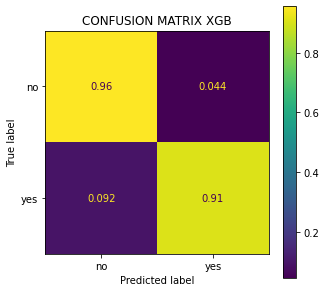

In [143]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_xgb, normalize="true", labels=[0,1], display_labels=["no", "yes"], ax=ax)
ax.set_title("CONFUSION MATRIX XGB");
plt.savefig("report/confusion_matrix_xgb.jpg")

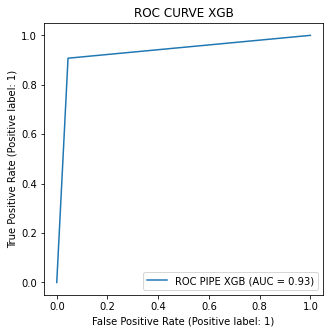

In [144]:
fig, ax = plt.subplots(figsize=(5,5))
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_pred_xgb, name="ROC PIPE XGB", ax=ax)
ax.set_title("ROC CURVE XGB");
plt.savefig("report/roc_curve_xgb.jpg")

In [127]:
lgb = LGBMClassifier()
pipe_lgb = make_pipeline(scaler, lgb)
pipe_lgb.fit(X_train, y_train)
y_pred_lgb = pipe_lgb.predict(X_test)

In [136]:
with open("model/model_lgb.pk", "wb") as file:
    pk.dump(pipe_lgb, file)

In [128]:
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      8457
         1.0       0.96      0.90      0.93      8457

    accuracy                           0.93     16914
   macro avg       0.93      0.93      0.93     16914
weighted avg       0.93      0.93      0.93     16914



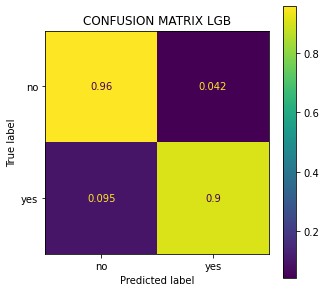

In [145]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_lgb, normalize="true", labels=[0,1], display_labels=["no", "yes"], ax=ax)
ax.set_title("CONFUSION MATRIX LGB");
plt.savefig("report/confusion_matrix_lgb.jpg")

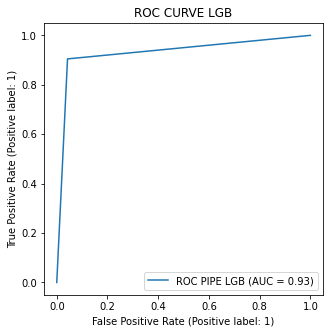

In [146]:
fig, ax = plt.subplots(figsize=(5,5))
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_pred_lgb, name="ROC PIPE LGB", ax=ax)
ax.set_title("ROC CURVE LGB");
plt.savefig("report/roc_curve_lgb.jpg")